In [1]:
import math

from scipy.stats import norm
import matplotlib.pyplot as plt
from world.agents.stochastic_agent import StochasticAgent
from world.robots.basic_robot import BasicRobot
from utils.functions import meeting_points_with_sigmas

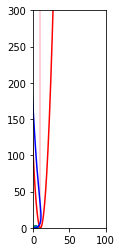

In [2]:

from utils.point import Point

robot = (2,0)
robot_point = Point(robot[0],robot[1])
fv = 2
mu = 10
sigma = 1
agent = (mu, 0)

t = 300

mus = [mu for _ in range(t)]
sigmas = [(i**0.5) * sigma for i in range(t)]
vars = [i * (sigma**2) for i in range(t)]
vars2 = [i * (sigma**2) / 2 for i in range(t)]
arrivals = [robot_point.shifted(distance=fv*i,
                                bearing=robot_point.direction_with(Point(mu-sig,i))) for i,sig in zip(range(t), sigmas)]
arrivals_x = [p.x for p in arrivals]
arrivals_y = [p.y for p in arrivals]

plt.plot(mus,list(range(t)),color='pink')
plt.plot([mu - sig for sig in sigmas],list(range(t)),color='red')
plt.plot([mu + sig for sig in sigmas],list(range(t)),color='red')
# plt.scatter([mu - var for var in vars],list(range(t)),color='green')
# plt.scatter([mu + var for var in vars],list(range(t)),color='green')
# plt.scatter([mu - var for var in vars2],list(range(t)),color='green')
# plt.scatter([mu + var for var in vars2],list(range(t)),color='green')
plt.scatter(robot[0],robot[1],color='teal')
plt.plot(arrivals_x,arrivals_y,color='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0,100])
plt.ylim([0,300])
plt.show()

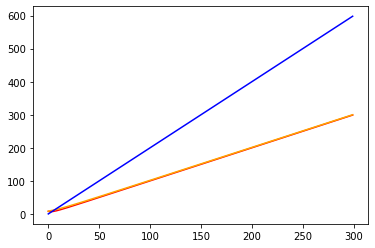

In [3]:
distances_from_robot1 = [Point(mu-sig,i).distance_to(robot_point) for i,sig in zip(range(t),sigmas)]
distances_from_robot2 = [Point(mu+sig,i).distance_to(robot_point) for i,sig in zip(range(t),sigmas)]
plt.plot(list(range(t)),distances_from_robot1,color='red')
plt.plot(list(range(t)),distances_from_robot2,color='orange')
plt.plot(list(range(t)),[fv*i for i in range(t)],color='blue')
plt.show()

In [4]:
from scipy.optimize import fsolve
import pylab
import numpy

def findIntersection(f1,f2,x0):
    return fsolve(lambda x : f1(x) - f2(x),x0)

def robot_walk(x):
    return x * fv

def left_dist_from_robot(x):
    sigma_left_point = Point(mu - sigma * x**0.5, x + agent[1])
    return robot_point.distance_to(sigma_left_point)

def right_dist_from_robot(x):
    sigma_right_point = Point(mu + sigma * x**0.5, x + agent[1])
    return robot_point.distance_to(sigma_right_point)

result1 = findIntersection(robot_walk,left_dist_from_robot,0.0)
result2 = findIntersection(robot_walk,right_dist_from_robot,0.0)

print(result1)
print(result2)

# x = numpy.linspace(-2,2,50)
# pylab.plot(x,f1(x),x,numpy.f2(x),result,numpy.sin(result),'ro')
# pylab.show()

[3.53351894]
[0.]


/var/folders/k3/njy_phnd1t377mlygnjxkmbh0000gn/T/ipykernel_1275/2050476638.py:16: RuntimeWarning: invalid value encountered in sqrt
  sigma_right_point = Point(mu + sigma * x**0.5, x + agent[1])
/Users/orifogler/PycharmProjects/dsd/venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


POINT (6.037448563949115 12.07489712789823)


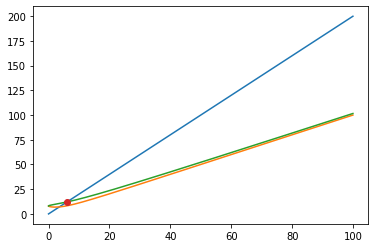

In [5]:
import numpy as np
from shapely.geometry import LineString

X = np.arange(0, 100, 0.1)

f=[robot_walk(x) for x in X]
g=[left_dist_from_robot(x) for x in X]
h=[right_dist_from_robot(x) for x in X]

plt.plot(X, f)
plt.plot(X, g)
plt.plot(X, h)

first_line = LineString(np.column_stack((X, f)))
second_line = LineString(np.column_stack((X, g)))
third_line = LineString(np.column_stack((X, h)))
intersection = first_line.intersection(third_line)

print(intersection)
plt.plot(*intersection.xy, 'o')

(8.116907977582914,3.5460355648908726)
(12.457207897045347,6.037870649302019)


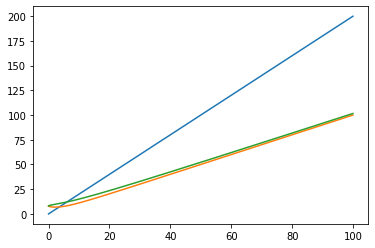

In [6]:
plt.plot(X, f)
plt.plot(X, g)
plt.plot(X, h)

robot = BasicRobot(loc=robot_point, fv=2)
agent = StochasticAgent(loc=Point(agent[0],agent[1]), v=1, sigma=sigma)
l,r = meeting_points_with_sigmas(robot, agent, 200)

print(l)
print(r)